<a href="https://colab.research.google.com/github/Sompote/PSO_constitutive/blob/main/PSO_UBC_sand_cohesion_v2_7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PSO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation, Dense,Flatten,LSTM,Dropout, GRU
import warnings
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("fivethirtyeight")

df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/constitutive/triaxail_compresion.xlsx')

#ks = pd.concat([df, df2,df3]).reset_index(drop=True)

ks=pd.DataFrame()

In [ ]:
df

,es,po,q,p
0,0.00000,50,-0.11263,50.24785
1,0.01001,50,14.32771,50.82576
2,0.02003,50,22.05459,50.98853
3,0.03003,50,31.09291,51.05771
4,0.04000,50,45.59405,51.09657
...,...,...,...,...
56,0.91022,200,524.25170,186.07415
57,0.92050,200,524.69661,186.17654
58,0.93047,200,525.11251,186.27271
59,0.93827,200,525.42774,186.34589


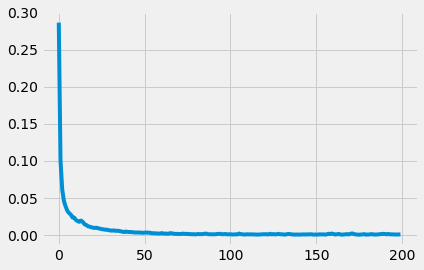

In [ ]:
def scaler(xtrain1,y_train1):#scale data
  #scaler
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y

#Build the DL model
def model_fit(x_train,y_train):
  model_test = Sequential()
  model_test.add(Dense(50, activation="relu",input_dim=x_train.shape[1]))
  model_test.add(Dense(50))



  model_test.add(Dense(y_train.shape[1]))
  # Compile the model
  model_test.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])
  history = model_test.fit(x_train, y_train, batch_size=3, epochs=200, verbose=0)
  #scores = model_dll.evaluate(x_test, y_test, verbose=0)
  plt.plot(history.history['loss'])
  return model_test

def predict_value(model,scaler_x,scaler_y,input): #predict_data
#prediciton
  input=[input]
  input=np.reshape(input,(1,2))
  input_scale=scaler_x.transform(input)
  predict = model.predict([input_scale])
  pre_nonscale=scaler_y.inverse_transform(predict)
  return pre_nonscale

ks=df
yi=ks.drop(['es','po'], axis=1).to_numpy()
  #yi=ks[['qn']].copy()
xi=ks[['es','po']].copy().to_numpy()
x_train, y_train, scaler_x, scaler_y =scaler(xi,yi)
model_test=model_fit(x_train,y_train)
predict_new=predict_value(model_test,scaler_x,scaler_y,[0.2,50])

In [ ]:
predict_value(model_test,scaler_x,scaler_y,[1,200])

array([[522.50665, 187.23213]], dtype=float32)

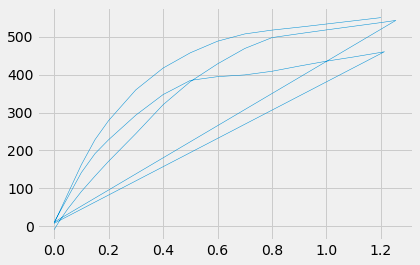

In [ ]:
#chcek model
predict_ini=np.array([30000,20000,0.2])
predict=model_test(x_train)
result=scaler_y.inverse_transform(predict)
plt.plot(xi[:,0],result[:,0],linewidth=0.5)
#plt.plot(df2['ev'],df2['q'])

In [ ]:
x_train.shape

(60, 2)

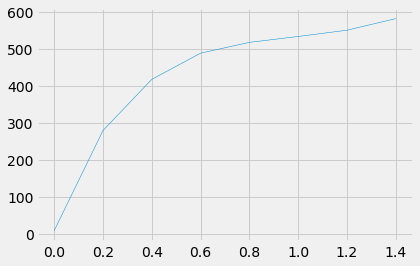

In [ ]:
#check DNN model
es=np.round(np.arange(0,1.5,0.2),1)
es=np.reshape(es,(es.shape[0],1))
pres= np.empty(es.shape[0])
pres.fill(200)
pres=np.reshape(pres,(pres.shape[0],1))
input=np.hstack((es,pres))
input_scale=scaler_x.transform(input)
predict = model_test.predict([input_scale])
result=scaler_y.inverse_transform(predict)
plt.plot(es,result[:,0],linewidth=0.5)



In [ ]:
pres.shape

array([[ 14.833116,  50.13217 ],
       [185.11067 ,  71.09344 ],
       [325.15958 , 112.34522 ],
       [434.54855 , 149.39348 ],
       [497.11874 , 170.26991 ],
       [519.09753 , 177.32468 ],
       [531.1263  , 182.34343 ],
       [551.3404  , 188.5289  ],
       [574.44336 , 196.42342 ],
       [597.32623 , 204.92265 ]], dtype=float32)

In [ ]:
#------------------------------------------------------------------------------+
#
#	Nathan A. Rooy
#	Simple Particle Swarm Optimization (PSO) with Python
#	Last update: 2018-JAN-26
#	Python 3.6
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from random import random
from random import uniform

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self, x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i.copy()
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random()
            r2=random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]


def minimize(costFunc, x0, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions=len(x0)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i<maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}')

        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    if verbose:
        print('\nFINAL SOLUTION:')
        print(f'   > {pos_best_g}')
        print(f'   > {err_best_g}\n')

    return err_best_g, pos_best_g



In [ ]:
'''
Forward integration for UBC sand Model
by Dr. Sompote Youwai
KMUTT
2021
q-p is stand for t-s stress space
'''
from math import *
import pandas as pd
import numpy as np
def cot(rad): return 1/tan(rad)
def G_e(kg_e,pa,p,me,poi): #elstic part
  Ge=kg_e*pa*(p/pa)**me
  Ke=2*Ge*(1+poi)/(3*(1-2*poi))
  return Ge, Ke
def E_G(E,poi):
  Ge=E/(2*(1+poi))
  Ke=E/(3*(1-2*poi))
  return Ge,Ke

def Bfc(n,B_e,B_skem): return n*B_e/(1/B_skem-1)

def UBCsand(poi,kg_e,me,B_skem,n,B_e,np,kg,R_f,fee_peak,fee_cv,c,pa,po):
  n_cv=sin(radians(fee_cv))
  fee_p=radians(fee_peak)
  n_p=sin(fee_p) #peak
  #forward euler explicit numerical integration
  q=0
  p=po
  es=0
  ev=0
  eslist=[0.]
  evlist=[0.]
  qlist =[0.]
  plist = [p]
  n_mlist=[0]
  n_dilist=[0]
  ulist=[0]
  dp=0
  u=0
  n_m=q/p
  #forward integration
  incre=.0001 #strain increment of es
  laststrain=0.04 #maximum strain
  des=incre
  while es < laststrain:
    G, K =G_e(kg_e,pa,p,me,poi) #elastic
    Bf= Bfc(n,B_e,B_skem)
    dev=dp/(Bf)
    es+=des

    if q-(p*n_m)-c < 0:
      dq:float128=3*G*des
      dp:float128=K*dev
      du=dq-dp
      ev+=dev
      u+=du
      p+=dp
      q+=dq
       #add data to list
      es_f=float("{:.4f}".format(es))*100
      es_r=round(es_f,2) #round number to serach for
      eslist.append(es_r)
      evlist.append(ev)
      ulist.append(u)
      plist.append(p)
      qlist.append(q*2)
      n_mlist.append(n_m)
      #print('elastic')
    else:
      n_m=(q-c)/p

      while es < laststrain:
        es+=des
        G, K =G_e(kg_e,pa,p,me,poi)
        Bf= Bfc(n,B_e,B_skem)
        dev=dp/(Bf)
        n_di=n_m-n_cv
        #n_di=(n_m*p-(n_cv*p+c))/p
        #n_r=(n_m*p)/(n_p*p+c)
        n_r=n_m/n_p
        #print('plastic',n_r,n_di)

        dp:float128=3*G*K*des*n_di/(3*G + K*n_di*n_m + kg*p*abs(p/pa)**(np - 1)*(-R_f*n_r + 1)**2) + dev*(
            -K**2*n_di*n_m/(3*G + K*n_di*n_m + kg*p*abs(p/pa)**(np - 1)*(-R_f*n_r + 1)**2) + K)



        dq:float128=3*G*K*dev*n_m/(3*G + K*n_di*n_m + kg*p*abs(p/pa)**(np - 1)*(-R_f*n_r + 1)**2) + des*(
            -9*G**2/(3*G + K*n_di*n_m + kg*p*abs(p/pa)**(np - 1)*(-R_f*n_r + 1)**2) + 3*G)


        du=dq-dp
        p+=dp
        q+=dq
        ev+=dev
        u+=du
        #es_plastic=incre-dq/(3*G)
        #n_m += (kg*(p/pa)**(np - 1)*(-R_f*n_m/n_p + 1)**2)*es_plastic
        n_m=(q-c)/p


        #add data to list
        es_f=float("{:.4f}".format(es))*100
        es_r=round(es_f,2) #round number to serach for
        eslist.append(es_r)
        evlist.append(ev)
        plist.append(p)
        qlist.append(2*q)
        ulist.append(u)
        n_mlist.append(n_m)
        n_dilist.append(n_di)
  df = pd.DataFrame(columns=['q', 'p','es', 'n_di','n_m','u'])


  df['q']=qlist
  df['p']=plist
  df['es']=eslist
  df['n_m']=n_mlist
  df['u']=ulist

  return df


def model_ubc_sand_select(var1,var2,var3,var4, var5,var6, var7, var8,var9,po,es):
  df=UBCsand(
  #E=var1,
  kg_e=var1,
  poi=var2,
  me=var3,
  B_skem=0.98, #B skmempton
  n=0.4, #porosity
  B_e=2e6, #bulk modulus of fluid


  #plastic parameter
  np=var4,
  kg=var5,
  R_f=var9,
  fee_peak=var6,
  fee_cv =var7,
  c=var8,
  pa=100,
  po=po)
  df_select=df[df['es']==es]
  result=df_select.to_numpy()
  con_model_result=result[:,:2]
  return con_model_result



In [ ]:
model_ubc_sand_select(300, 0.2, 0.5, 0.5, 290.1484199757287, 10, 5, 200, 0.9,100,0.8)

array([[439.57897349626006, 114.20108950053788]], dtype=object)

In [ ]:
b

,q,p,es,n_di,n_m,u
0,0.000000,200.000000,0.000,NaN,0.000000,0.000000
1,3.394113,200.000000,0.015,NaN,0.000000,1.697056
2,6.788225,200.000000,0.030,NaN,0.000000,3.394113
3,10.182338,200.000000,0.045,NaN,0.000000,5.091169
4,13.576450,200.000000,0.060,NaN,0.000000,6.788225
...,...,...,...,...,...,...
995,566.575494,226.371837,14.940,NaN,0.367925,256.915910
996,566.621333,226.425948,14.955,NaN,0.367938,256.884719
997,566.667174,226.480075,14.970,NaN,0.367951,256.853512
998,566.713015,226.534218,14.985,NaN,0.367964,256.822289


In [ ]:
round(1.222,1)

1.2

In [ ]:
def fc(x):
  er=np.array([]) #sum error each strain level
  strain=np.round(np.arange(0,1.2,0.1),1)
  for po in [50,200]: #check diffrent initial pressure
    for es in strain: #check diffrent strain level
      predict_ini0=np.array([es,po],dtype=object) #from test results
      predict_con=model_ubc_sand_select(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],po,es) #constitutive model
      predict_test=predict_value(model_test,scaler_x,scaler_y,predict_ini0)
      er_matrix=np.absolute(predict_con-predict_test)
      if er_matrix.shape[0] == 0:
        f_error=0.8
      else:
        f1:float128 =er_matrix[0,0]/predict_test[0,0] #diffrent q
        f2:float128 = er_matrix[0,1]/predict_test[0,1] #diffrent p
        #f3 = er_matrix[0,2]/predict_test[0,2]
        f_error=(10*f1+f2)/11 #weight q more than p
      er=np.append(er,f_error)

  f=np.average(er) #average error
  return f

In [ ]:
initial=[187.76808683635312, 0.1, 0.5048535396143976, 0.3, 285.72270584843506, 20.02467178305838, 5.062955223331168, 182.49974057653577, 0.99]      # initial starting location [x1,x2...]
bounds=[(100,500),(0.1,0.4),(0.1,0.9),(0.1,0.9),(100,400),(5,40),(5,40),(100,400),(0.80,0.99)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]


model_result=minimize(fc,initial,bounds,num_particles=50,maxiter=50,verbose=True)

iter:    0, best solution:  -1.000000
iter:    1, best solution:   0.114239
iter:    2, best solution:   0.082884
iter:    3, best solution:   0.082878
iter:    4, best solution:   0.081331
iter:    5, best solution:   0.080913
iter:    6, best solution:   0.080519
iter:    7, best solution:   0.080029
iter:    8, best solution:   0.079166
iter:    9, best solution:   0.078443
iter:   10, best solution:   0.077546
iter:   11, best solution:   0.076409
iter:   12, best solution:   0.075342
iter:   13, best solution:   0.074569
iter:   14, best solution:   0.073708
iter:   15, best solution:   0.072903
iter:   16, best solution:   0.072167
iter:   17, best solution:   0.070699
iter:   18, best solution:   0.070462
iter:   19, best solution:   0.069942
iter:   20, best solution:   0.069922
iter:   21, best solution:   0.069922
iter:   22, best solution:   0.069897
iter:   23, best solution:   0.069897
iter:   24, best solution:   0.069897
iter:   25, best solution:   0.069804
iter:   26, 

In [ ]:
np.round(np.arange(0,1.6,0.1),1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5])

In [ ]:
predict_ini0=np.array([0.9,100],dtype=object)
predict_value(model_test,scaler_x,scaler_y,predict_ini0)

array([[409.7377 , 153.48666]], dtype=float32)

In [ ]:
a,b=model_ubc_sand_select(x[0],x[1],x[2],x[3],x[4],100,0.9)
b[b['es']==0.89]

NameError: ignored

In [ ]:
b.iloc[90,2]

0.8999999999999999

In [ ]:
np.arange(0,1.4,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [ ]:
c

array([[  0.        ,   0.        ],
       [ 22.810709  ,  99.62622833],
       [233.13955688, 107.02894592],
       [351.28833008, 131.92114258],
       [391.0680542 , 145.2454834 ],
       [404.42608643, 151.11602783],
       [426.20245361, 157.49514771],
       [448.35821533, 166.59677124]])

In [ ]:
np.round(np.arange(0,1.4,0.2),1)


array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [ ]:
a

0.4962664382114533